In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import scipy

import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('/Users/chstansbury/PyCharmProjects/python-arpes/')


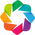

In [21]:
# Core #
import json
import os
import re

# IO
import h5py

# Science And Plotting #
import matplotlib
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import holoviews as hv
import holoviews.util
hv.extension('bokeh')

sns.set()

from scipy import optimize

# Analysis #
import arpes
import arpes.config
from arpes.models.spectrum import DLD_Spectrum_factory, load_SES
from arpes.models.view import View

# Jupyter #
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# Configure Jupyter #
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [3]:
from arpes.pipelines import convert_scan_to_kspace
from arpes.utilities import walk_scans
from arpes.config import SOURCE_PATH
from arpes.io import load_dataset
import os.path

In [4]:
datasets = list(walk_scans(os.path.join(SOURCE_PATH, 'datasets/RhSn2')))

In [63]:
hv_scan = load_dataset(convert_scan_to_kspace(datasets[2]['id']))

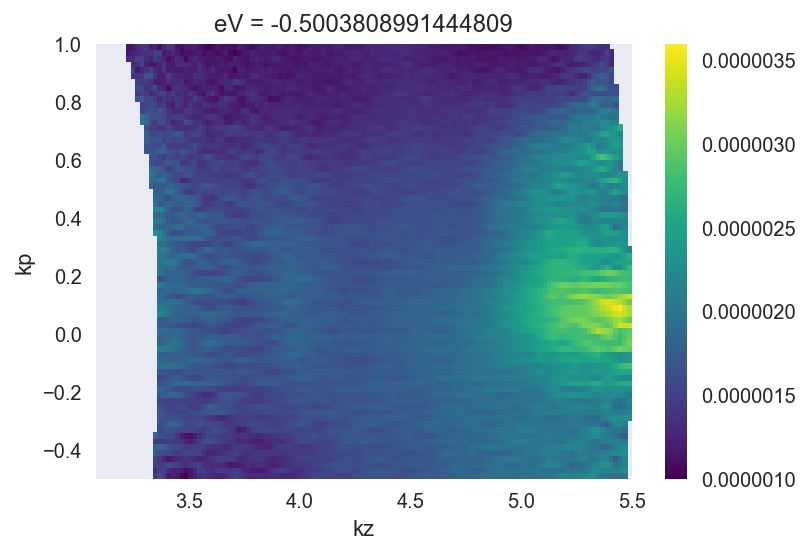

In [64]:
hv_scan.sel(eV=-0.5, method='nearest').sel(kz=slice(3.0, 5.5), kp=slice(-0.5, 1.0)).plot()

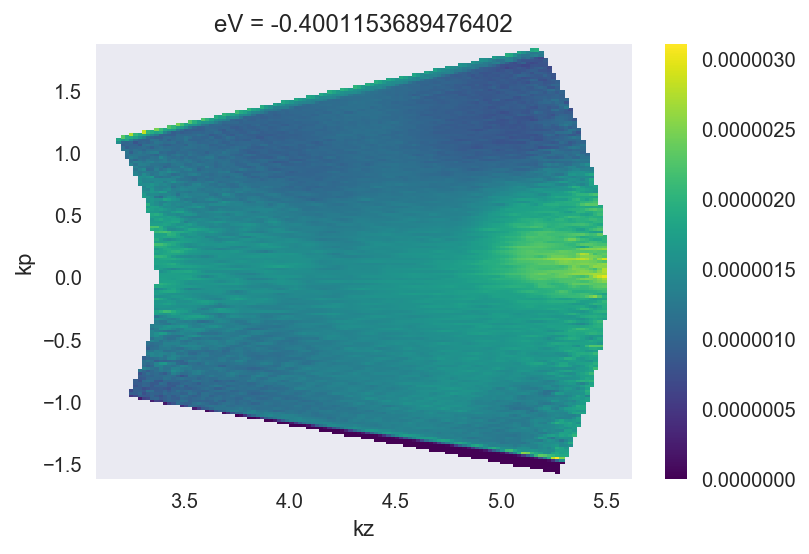

In [140]:
hv_scan.sel(eV=-0.4, method='nearest').plot()

In [52]:
raw_hv_scan = load_dataset(datasets[2]['id'])

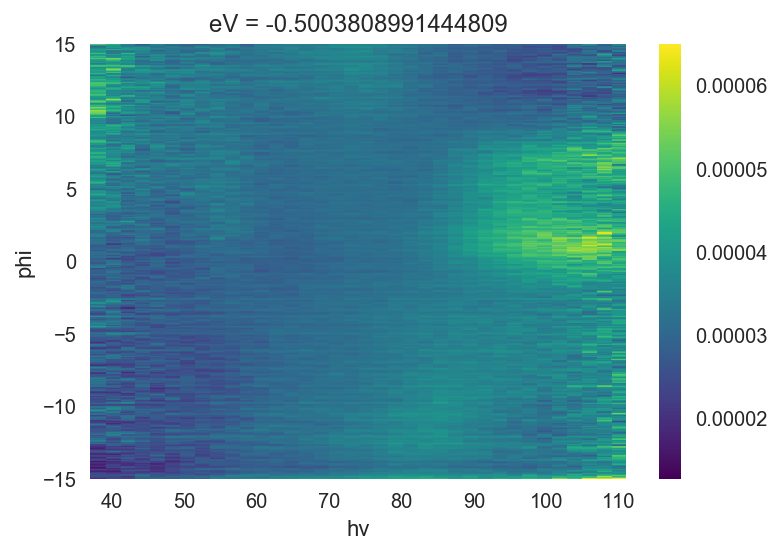

In [54]:
raw_hv_scan = load_dataset(datasets[2]['id'])
from arpes.preparation import normalize_dim
raw_hv_scan = normalize_dim(raw_hv_scan.sel(phi=slice(-15,15)), 'hv')
raw_hv_scan = normalize_dim(raw_hv_scan, 'phi')
raw_hv_scan.sel(eV=-0.5, method='nearest').plot()

/Users/chstansbury/anaconda/envs/python_arpes/lib/python3.5/site-packages/matplotlib/colors.py:1119: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[res_mask] = 0


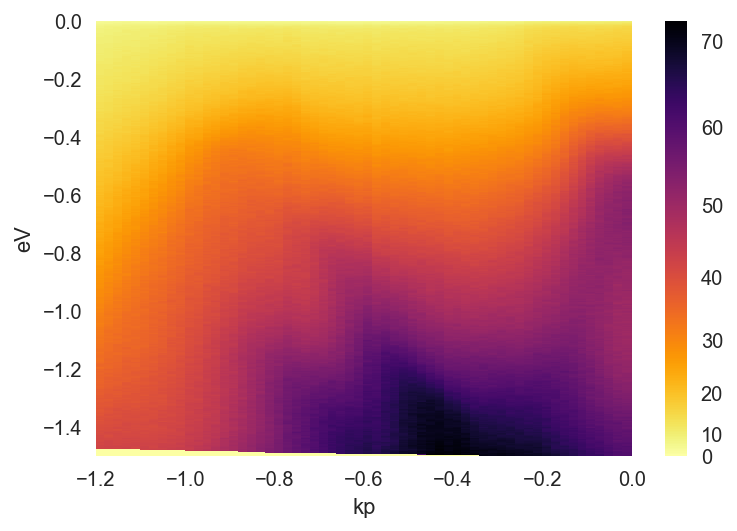

In [23]:
import matplotlib.colors as colors
scan = load_dataset(convert_scan_to_kspace(datasets[-3]['id']))
fig, ax = plt.subplots(1,1)
scan.sel(kp=slice(-1.2, 0), eV=slice(-1.5, 0)).plot(cmap='inferno_r', norm=colors.PowerNorm(1.5))

In [50]:
%%opts Curve {+framewise}
scan = load_dataset(convert_scan_to_kspace(datasets[8]['id']))
from arpes.plotting.interactive import autoview
autoview(scan)

:AdjointLayout
   :DynamicMap   []
   :DynamicMap   []
   :DynamicMap   []

In [ ]:
gaussian

In [60]:
from arpes.analysis import curvature, gaussian_filter_arr

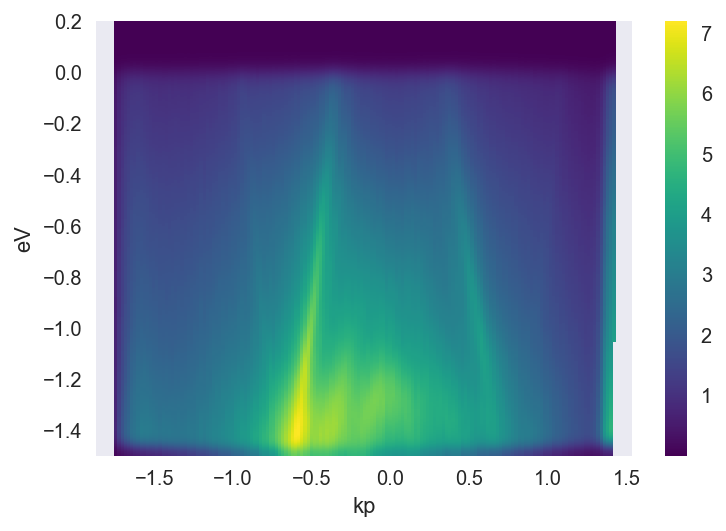

In [101]:
c = curvature(scan.sel(eV=slice(-2.0, 0), kp=slice(-0.5, 0.5)))
filtered = gaussian_filter_arr(scan, {'eV': 0.03, 'kp': 0})
filtered.plot()

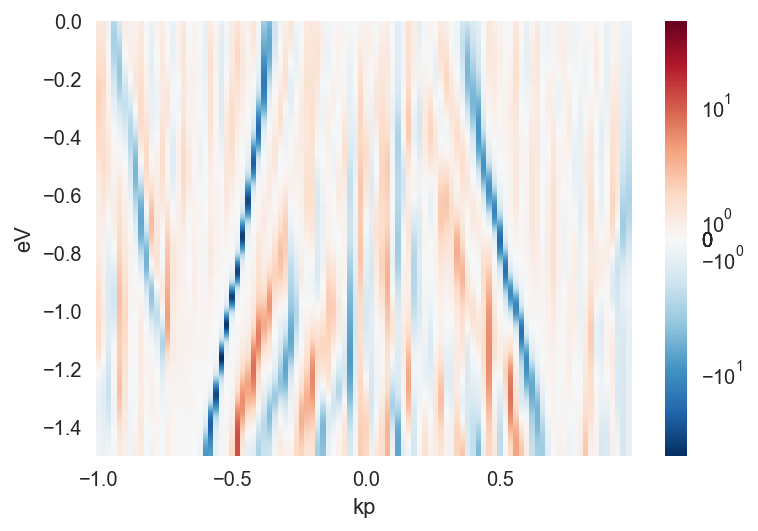

In [153]:
from arpes.analysis import curvature, boxcar_filter_arr
filtered = boxcar_filter_arr(scan, {'eV': 0.1, 'kp': 0.03}, n=10)
c = curvature(filtered.sel(eV=slice(-2.0, 0), kp=slice(-1, 1)), alpha=0.00001)
c.plot(norm=colors.SymLogNorm(5))

In [146]:
filtered.attrs['provenance']

{'parent_id': '6cdafdbe-aa22-11e7-98ad-6c40088ef8e6',
 'parents_provanence': {'parent_id': '6cd241c6-aa22-11e7-b93b-6c40088ef8e6',
  'parents_provanence': {'parent_id': '806f6468-a91f-11e7-a628-6c40088ef8e6',
   'parents_provanence': {'file': '/Users/chstansbury/Research/lanzara/data/RhSn2/hdf5/RhSn_009.h5',
    'parents_provenance': 'filesystem',
    'record': {'by': 'load_SES', 'what': 'Loaded SES dataset from HDF5.'},
    'time': '2017-10-05 15:57:11.640931'},
   'record': {'by': 'apply_quadratic_fermi_edge_correction',
    'correction': {'a': -0.0001150655301890268,
     'b': 0.0003013774413923895,
     'c': -0.004129006185233914},
    'what': 'Shifted Fermi edge to align at 0'},
   'time': '2017-10-05 16:10:48.941858'},
  'record': {'by': 'convert_to_kspace',
   'what': 'Automatically k-space converted'},
  'time': '2017-10-05 16:10:48.999100'},
 'record': {'by': 'boxcar_filter_arr',
  'size': (1, 14),
  'what': 'Boxcar filtered data'},
 'time': '2017-10-08 19:17:21.067654'}

In [17]:
colors.sy